In [ ]:
import pandas as pd
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

sns.set_theme('talk')
sns.set_palette("colorblind")

matplotlib.rcParams["figure.dpi"] = 300

In [ ]:
all_protocols = requests.get("https://api.llama.fi/protocols").json()

keywords = ['rebase', 'protocol-owned', 'reserve currency', 'ohm']

for protocol in all_protocols:
  for keyword in keywords:
    if keyword in protocol['description']:
      print(protocol['slug'], ":", protocol['description'])

olympus-dao : $OHM is a decentralized reserve currency that remains unbound by a peg.
wonderland : Wonderland is the first decentralized reserve currency protocol available on the Avalanche Network based on the TIME token.
mars-ecosystem : Mars Ecosystem is a new decentralized stablecoin paradigm, it integrates the creation and use of stablecoin into the same system. Mars Ecosystem consists of three parts: Mars Treasury, Mars Stablecoin and Mars DeFi protocols, which together form a positive feedback loop. Mars stablecoin is price-stable, capital-efficient, scalable and decentralized. The goal of Mars Ecosystem is to build the central bank and reserve currency of the DeFi world.
spartacus : Decentralized multi-chain reserve currency.
hector-dao : Hector is a decentralized storage protocol based on the HEC token – collateralized and backed by the Hector DAO. HEC will be the reserve currency on/of Fantom.
snowbank : $SB is a decentralized reserve currency that remains unbound by a peg. S

In [ ]:
OHM_FORKS = [
    "olympus-dao",
    "wonderland",
    "temple-dao",
    "klima-dao",
    "snowbank",
    "snowdog",
    "fortune-dao",
    "zerotwoohm",
    "kronos-dao",
    "euphoria",
    "hector-dao",
    "exodia",
    "spartacus",
    "gyro",
    "senpaiswap",
    "hunny-finance",
    "otterclam",
    "squiddao",
    "8ightdao",
    "reverse",
]

In [ ]:
def get_ohm_tvl(slug):
  raw = pd.read_csv(f"http://api.llama.fi/dataset/{slug}.csv")
  keep_cols = ['Date', raw.columns[5]]
  raw_kept = raw[keep_cols]
  raw_kept.columns=['date', slug]
  raw_kept=raw_kept.dropna().set_index('date').astype(float)
  raw_kept.index = raw_kept.index.map(lambda x: datetime.strptime(x, "%d/%m/%Y"))
  return raw_kept  

In [ ]:
ohm_tvl = []

for ohm_slug in OHM_FORKS:
  try:
    ohm_tvl.append(get_ohm_tvl(ohm_slug))
  except:
    print(f"failed to fetch {ohm_slug}")

ohm_tvl_df = pd.concat(ohm_tvl, axis=1)

ohm_tvl_b = ohm_tvl_df.T.sort_values('2021-11-28', ascending=False).T.div(1e9)
ohm_tvl_share = ohm_tvl_df.fillna(0).div(ohm_tvl_df.sum(1), axis=0).mul(100)

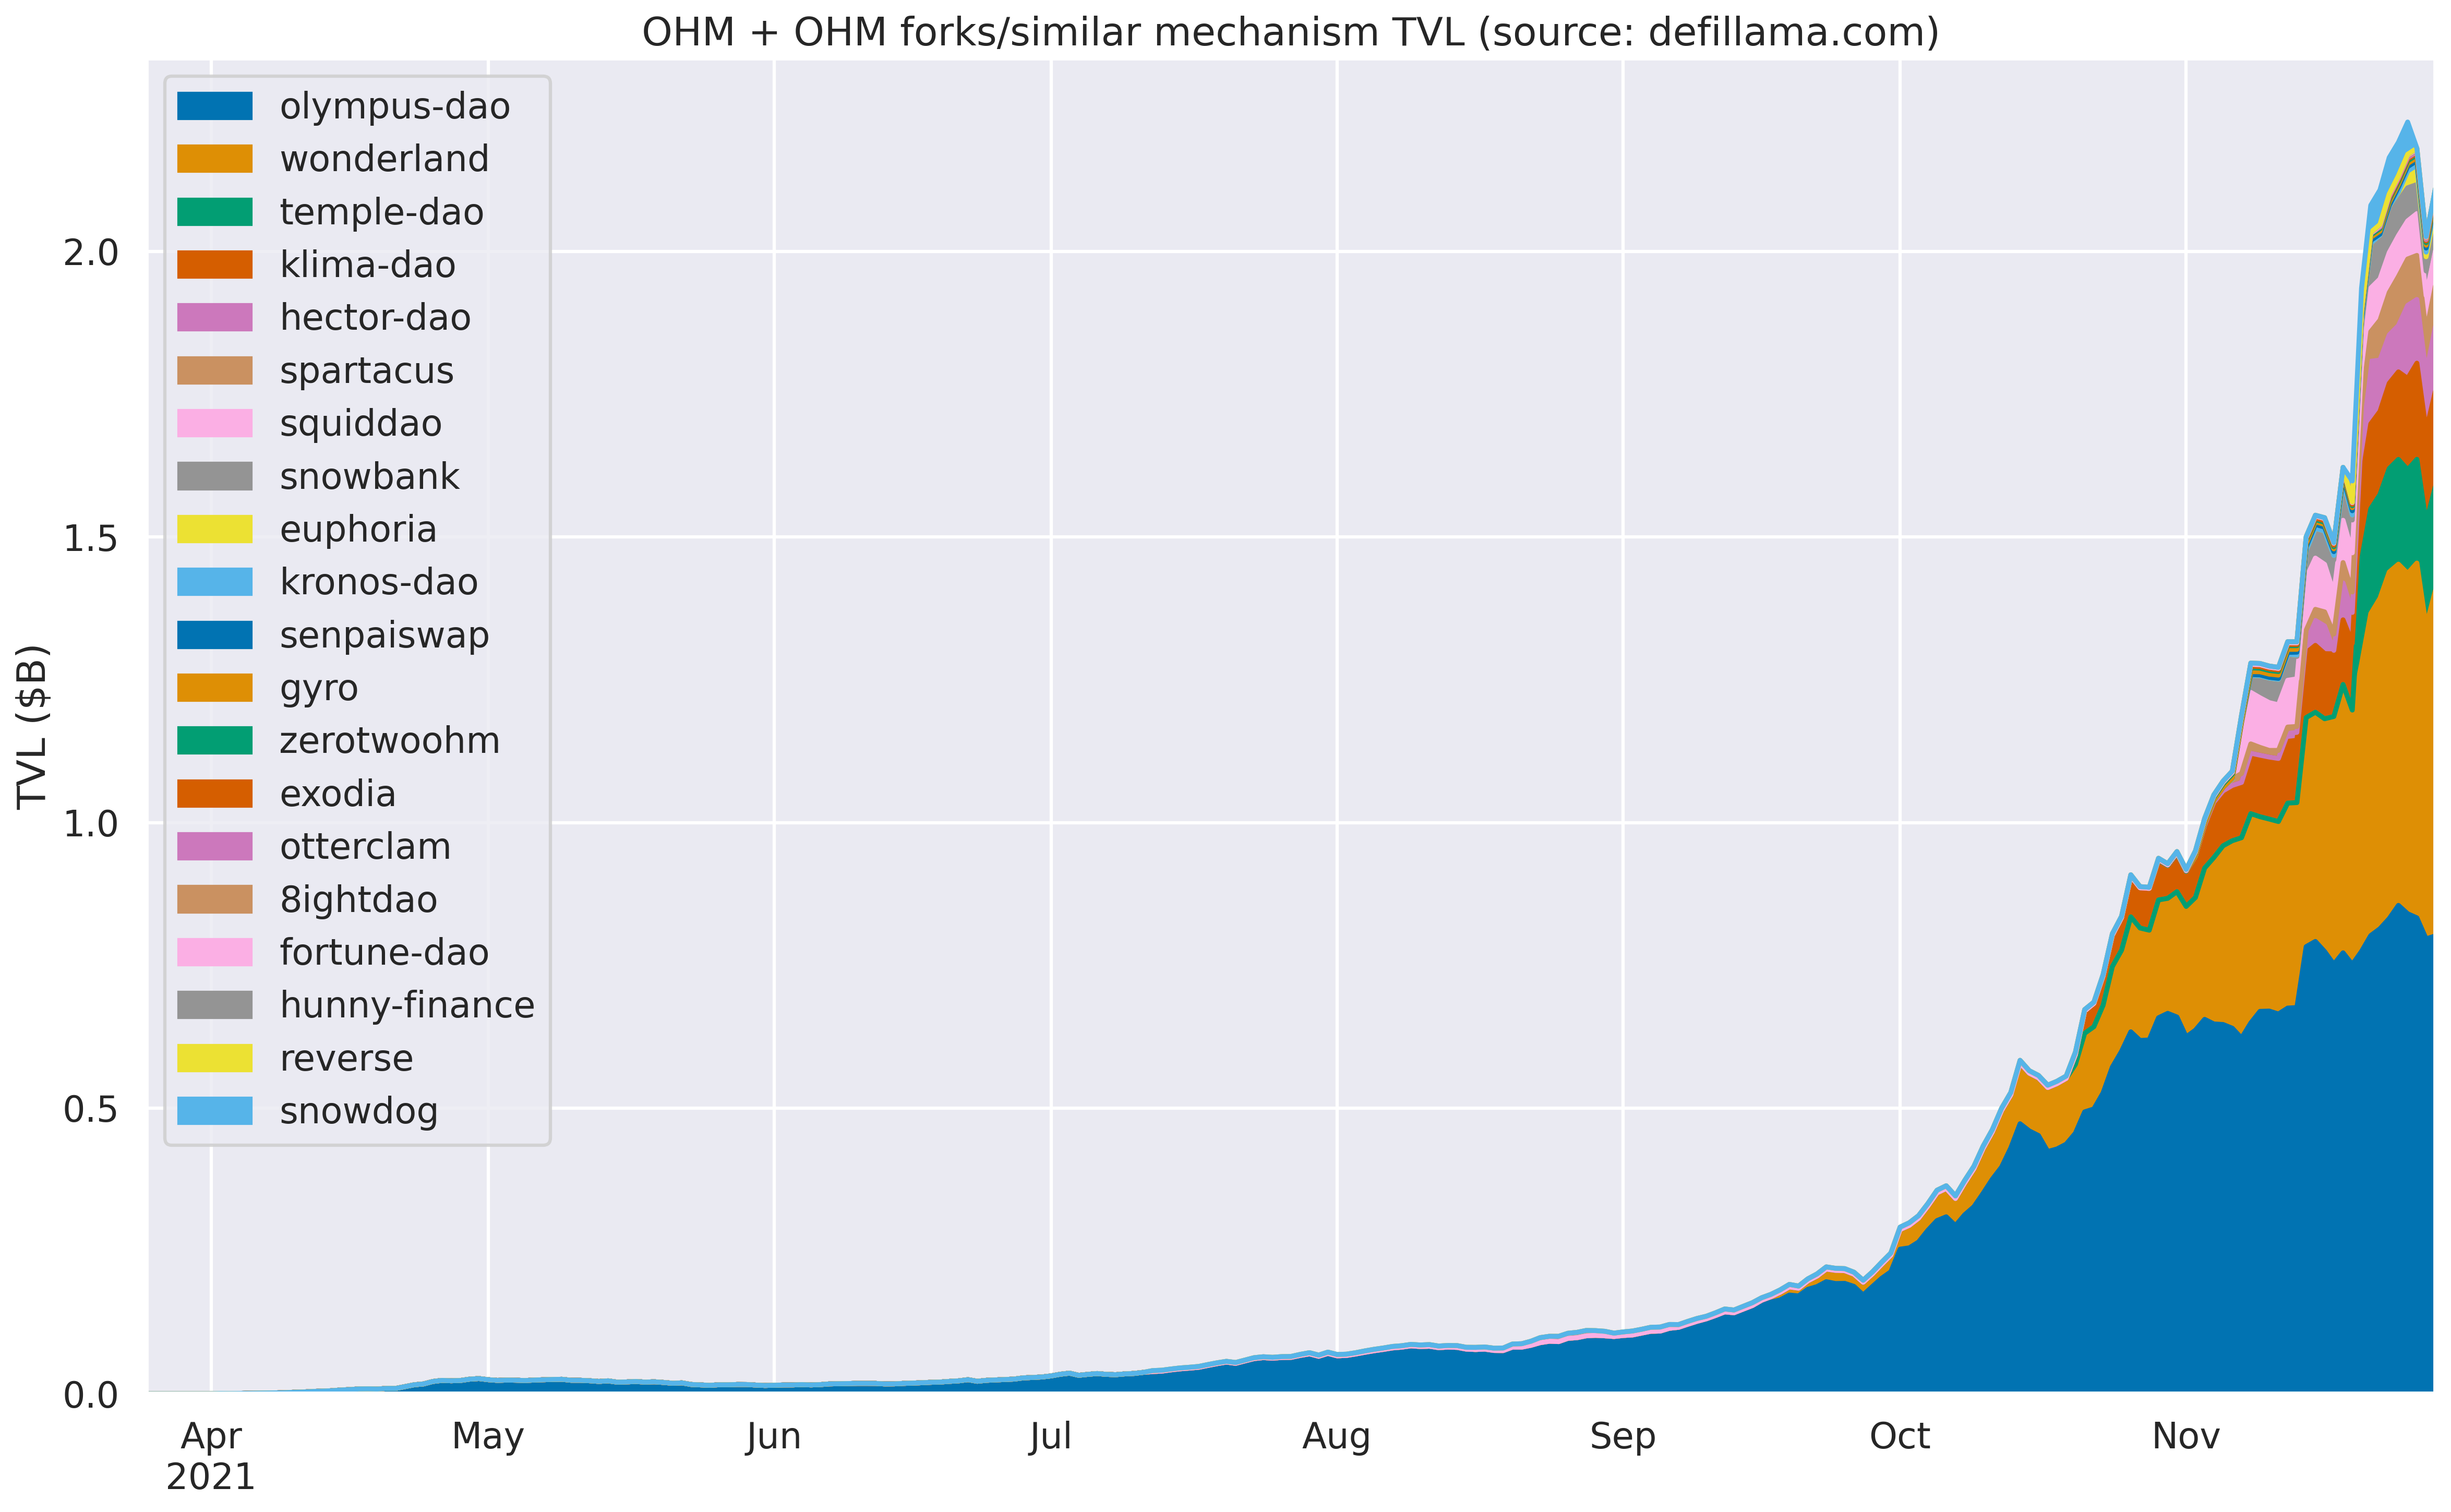

In [ ]:
ohm_tvl_b.plot(kind='area', figsize=(16, 10))
plt.title("OHM + OHM forks/similar mechanism TVL (source: defillama.com)")
plt.ylabel('TVL ($B)')
plt.xlabel('')
plt.tight_layout()

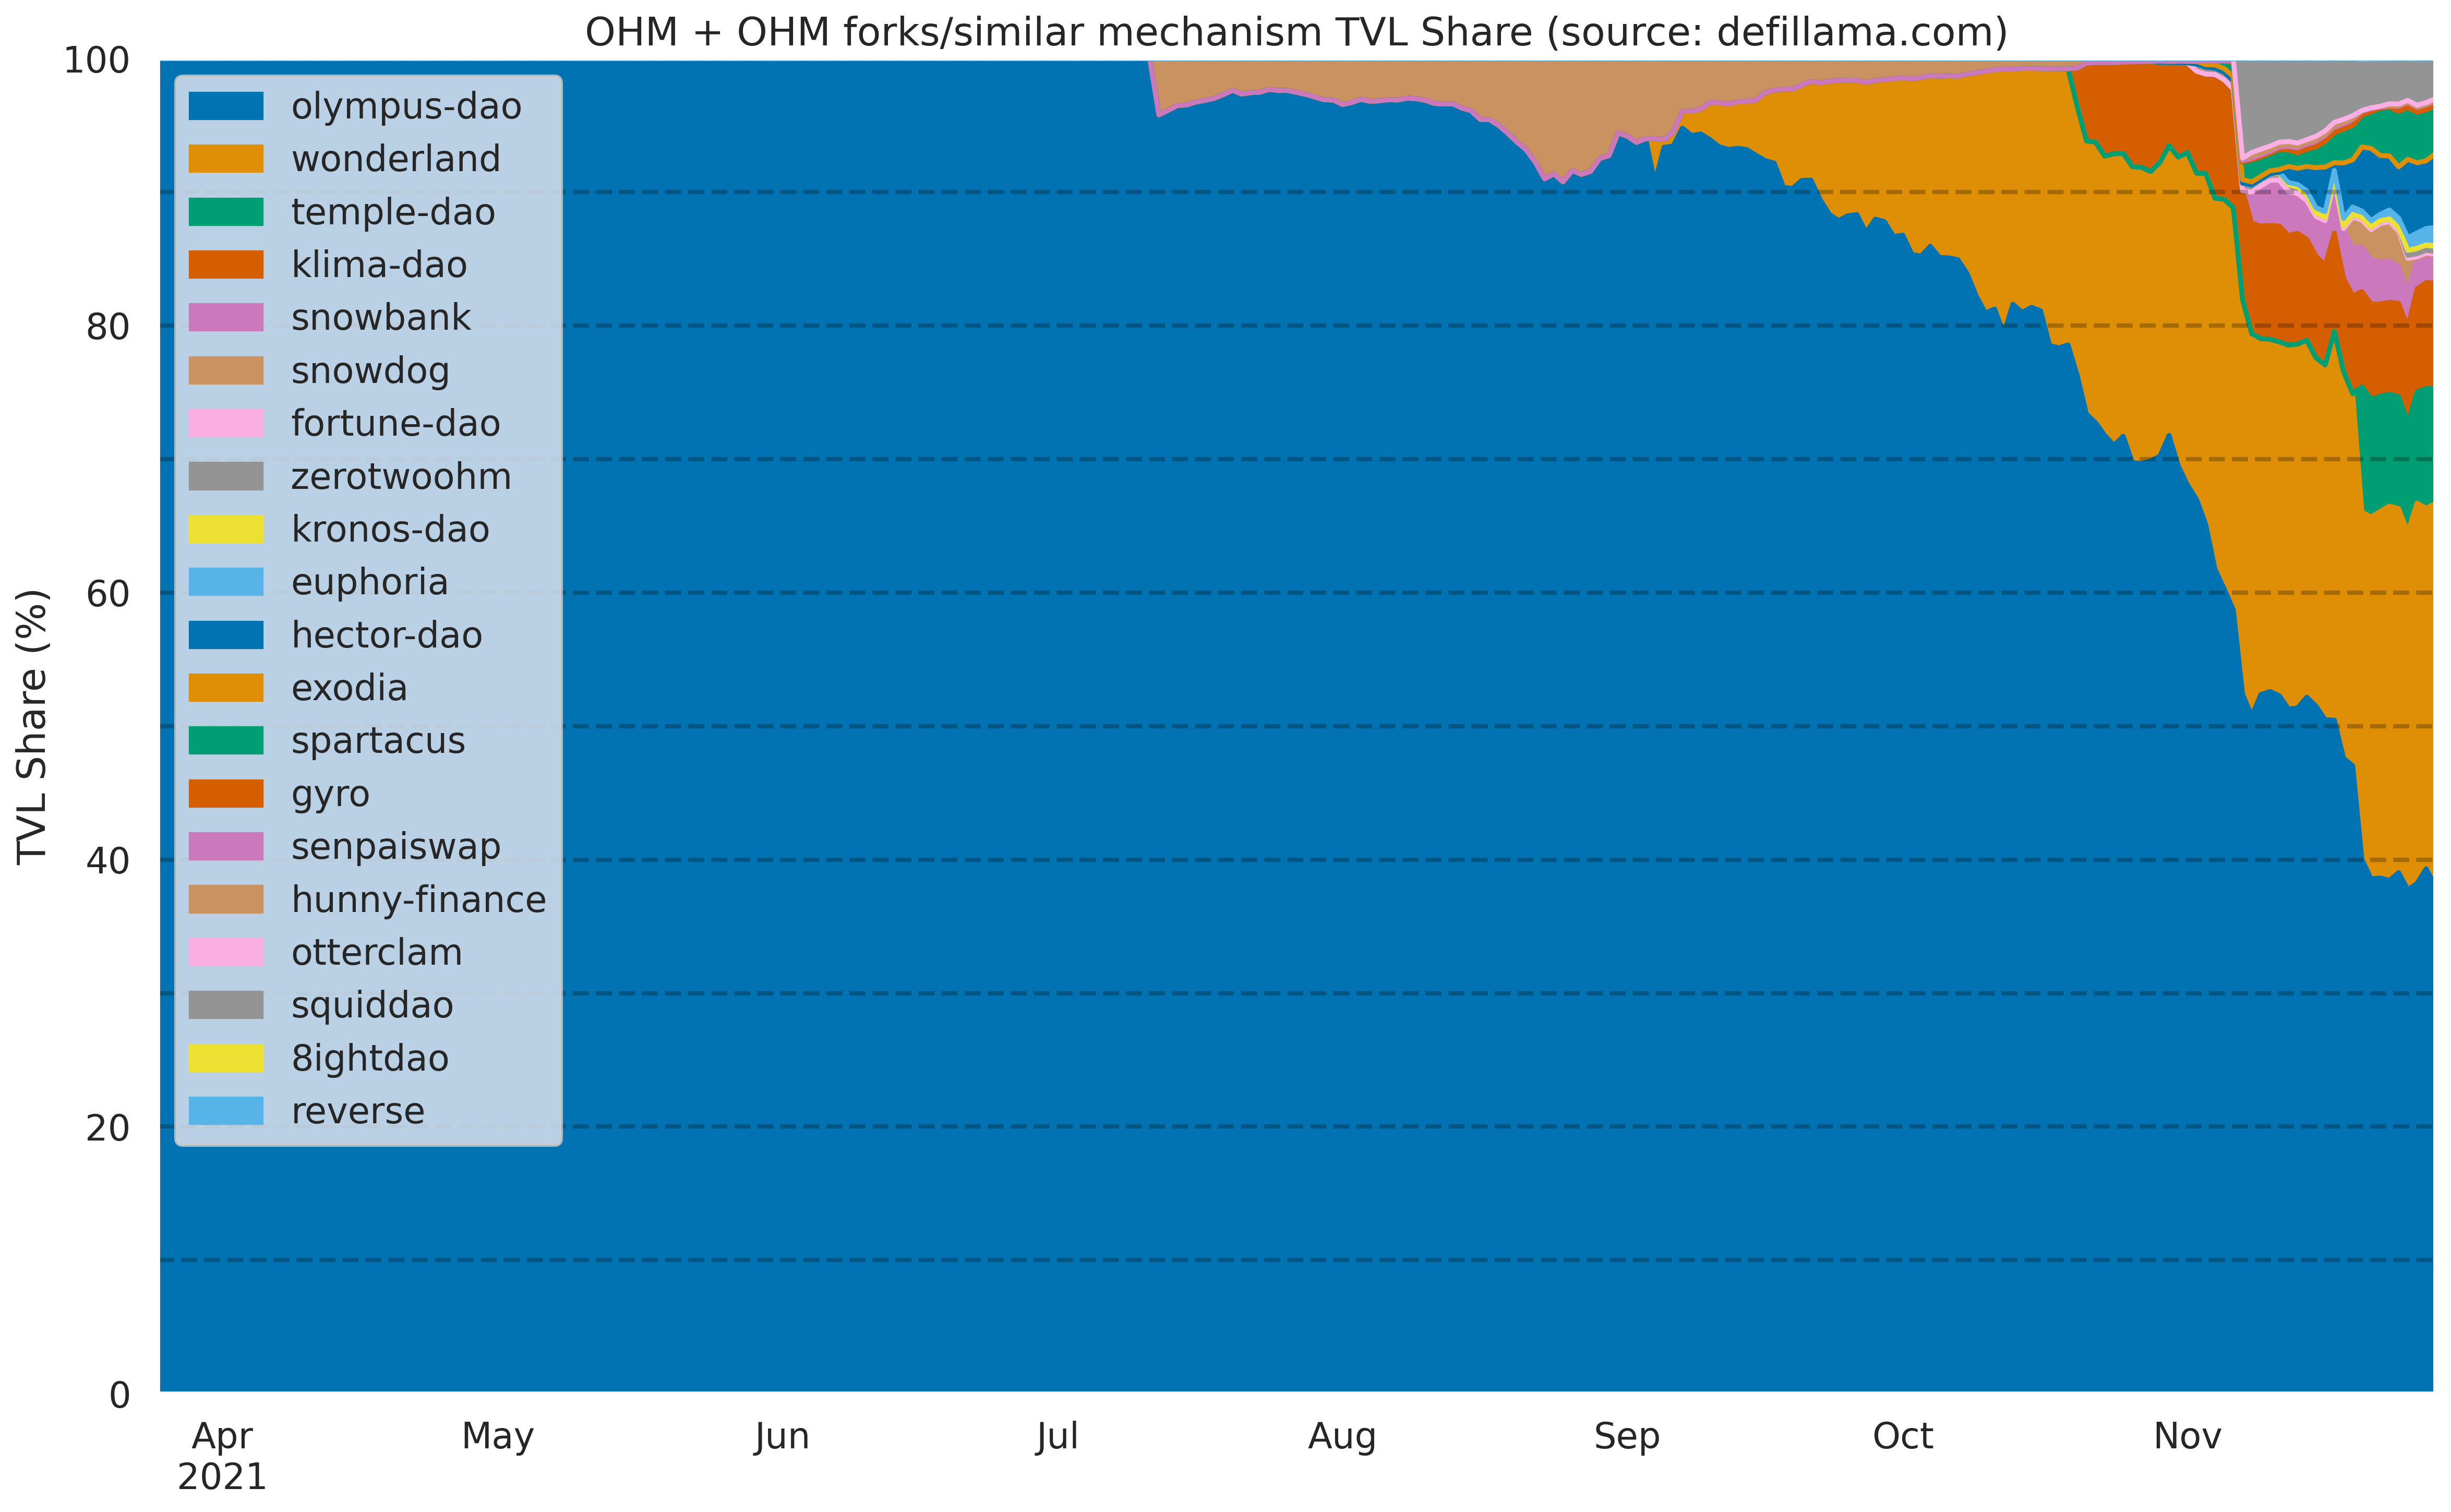

In [ ]:
ohm_tvl_share.plot(kind='area', figsize=(16, 10), ylim=(0,100))

for i in range(1, 11):
  plt.axhline(y=i * 10, ls='--', lw=2, color='black', alpha=0.25)

plt.title("OHM + OHM forks/similar mechanism TVL Share (source: defillama.com)")
plt.ylabel('TVL Share (%)')
plt.xlabel('')
plt.tight_layout()